In [1]:
import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s


In [32]:
csv1 = 'July19_csv/csi_noactivity_1.csv'

df = pd.read_csv(csv1,usecols=range(1,91))

df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))


A0_1= df["a_1"].values
A1_1= df["b_1"].values
A2_1= df["c_1"].values


len = np.size(A0_1)
print(len)
Fs = 1e4
Ts = 1/Fs
t = np.arange(0,len)/Fs

m0_1 = np.mean((phase(A0_1)-phase(A1_1)))
m1_1 = np.mean((phase(A1_1)-phase(A2_1)))
m2_1 = np.mean((phase(A2_1)-phase(A0_1)))

var = [np.var(((phase(A0_1)-phase(A1_1))-m0_1)),np.var(((phase(A1_1)-phase(A2_1))-m1_1)),np.var(((phase(A2_1)-phase(A0_1))-m2_1))]
print(var)

'''
plt.plot(t,(((phase(A0_1)-phase(A1_1))-m0_1)/m0_1))
plt.show()
plt.plot(t,(((phase(A1_1)-phase(A2_1))-m1_1)/m1_1))
plt.show()
plt.plot(t,(((phase(A2_1)-phase(A0_1))-m2_1)/m2_1))
plt.show()
'''



30007
[23331.126765820074, 32065.134177263517, 27153.69852738388]


'\nplt.plot(t,(((phase(A0_1)-phase(A1_1))-m0_1)/m0_1))\nplt.show()\nplt.plot(t,(((phase(A1_1)-phase(A2_1))-m1_1)/m1_1))\nplt.show()\nplt.plot(t,(((phase(A2_1)-phase(A0_1))-m2_1)/m2_1))\nplt.show()\n'

In [38]:

csv2 = 'July19_csv/csi_walk_a4c6_1.csv'
df2 = pd.read_csv(csv2,usecols=range(1,91))
df2 =df2.applymap(lambda s: np.complex(s.replace('i', 'j')))
data = abs(df2['a_21'])




pd_series = pd.Series(data)

counts = pd_series.value_counts()

entropy = s.entropy(counts)


print(entropy)

4.628655047187827


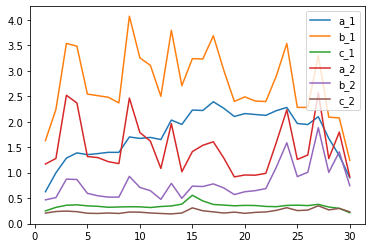

In [2]:
csv1 = 'July26_csv/csi_walk_c1_1.csv'
df = pd.read_csv(csv1,usecols=range(1,91))
df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))


V = np.zeros((30,3))

for i in range(1, 31):
    Z = []
    for k in ['a_','b_','c_']:
        Z.append(k + str(i)) 
    #print(Z)
    a= df[Z[0]].values
    b= df[Z[1]].values
    c= df[Z[2]].values
    
    m_a = np.mean(abs(a))
    m_b = np.mean(abs(b))
    m_c = np.mean(abs(c))
    
    #var = [np.var((abs(a)-m_a)/m_a),np.var((abs(b)-m_b)/m_b),np.var((abs(c)-m_c)/m_c)]
    var = [np.var((abs(a)-m_a)),np.var((abs(b)-m_b)),np.var((abs(c)-m_c))]
    V[i-1][:] = var
    
    
#########################################################################################3
csv2 = 'July19_csv/csi_noactivity_1.csv'
df2 = pd.read_csv(csv2,usecols=range(1,91))
df2 =df2.applymap(lambda s: np.complex(s.replace('i', 'j')))

V2 = np.zeros((30,3))

for i in range(1, 31):
    Z2 = []
    for k in ['a_','b_','c_']:
        Z2.append(k + str(i)) 
    #print(Z)
    a2= df2[Z2[0]].values
    b2= df2[Z2[1]].values
    c2= df2[Z2[2]].values
    
    m_a2 = np.mean(abs(a2))
    m_b2 = np.mean(abs(b2))
    m_c2 = np.mean(abs(c2))
    
    #var = [np.var((abs(a2)-m_a2)/m_a2),np.var((abs(b2)-m_b2)/m_b2),np.var((abs(c2)-m_c2)/m_c2)]
    var = [np.var((abs(a2))),np.var((abs(b2))),np.var((abs(c2)-m_c2))]
    V2[i-1][:] = var
    
############################################################################################
n = np.arange(1,31)
plt.plot(n,V[:,0],label = 'a_1')
plt.plot(n,V[:,1],label = 'b_1')
plt.plot(n,V[:,2],label = 'c_1')


plt.plot(n,V2[:,0],label = 'a_2')
plt.plot(n,V2[:,1],label = 'b_2')
plt.plot(n,V2[:,2],label = 'c_2')
plt.legend()
plt.show()

In [22]:
def phase (k):
    return np.angle(k,deg = True)

print(phase ([1.0, 1.0j, 1+1j]))

[ 0. 90. 45.]


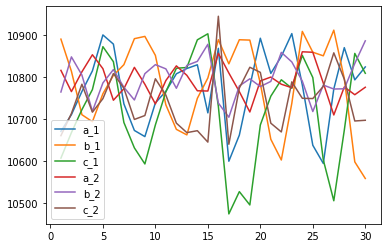

In [10]:
#####################################################

# THIS IS FOR PHASE ANALYSIS : 

####

csv1 = 'July26_csv/csi_walk_c1_1.csv'
df = pd.read_csv(csv1,usecols=range(1,91))
df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))


V = np.zeros((30,3))

for i in range(1, 31):
    Z = []
    for k in ['a_','b_','c_']:
        Z.append(k + str(i)) 
    #print(Z)
    a= df[Z[0]].values
    b= df[Z[1]].values
    c= df[Z[2]].values
    
    m_a = np.mean(phase(a))
    m_b = np.mean(phase(b))
    m_c = np.mean(phase(c))
    
    #var = [np.var((abs(a)-m_a)/m_a),np.var((abs(b)-m_b)/m_b),np.var((abs(c)-m_c)/m_c)]
    var = [np.var((phase(a)-m_a)),np.var((phase(b)-m_b)),np.var((phase(c)-m_c))]
    V[i-1][:] = var
    
    
#########################################################################################3
csv2 = 'July19_csv/csi_noactivity_1.csv'
df2 = pd.read_csv(csv2,usecols=range(1,91))
df2 =df2.applymap(lambda s: np.complex(s.replace('i', 'j')))

V2 = np.zeros((30,3))

for i in range(1, 31):
    Z2 = []
    for k in ['a_','b_','c_']:
        Z2.append(k + str(i)) 
    #print(Z)
    a2= df2[Z2[0]].values
    b2= df2[Z2[1]].values
    c2= df2[Z2[2]].values
    
    m_a2 = np.mean(phase(a2))
    m_b2 = np.mean(phase(b2))
    m_c2 = np.mean(phase(c2))
    
    #var = [np.var((abs(a2)-m_a2)/m_a2),np.var((abs(b2)-m_b2)/m_b2),np.var((abs(c2)-m_c2)/m_c2)]
    var = [np.var((phase(a2)-m_a2)),np.var((phase(b2)-m_b2)),np.var((phase(c2)-m_c2))]
    V2[i-1][:] = var
    
############################################################################################
n = np.arange(1,31)
plt.plot(n,V[:,0],label = 'a_1')
plt.plot(n,V[:,1],label = 'b_1')
plt.plot(n,V[:,2],label = 'c_1')


plt.plot(n,V2[:,0],label = 'a_2')
plt.plot(n,V2[:,1],label = 'b_2')
plt.plot(n,V2[:,2],label = 'c_2')
plt.legend()
plt.show()

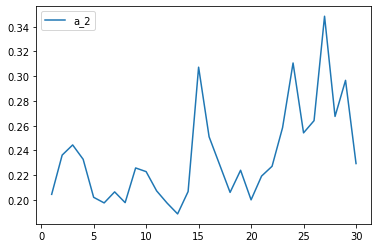

In [7]:
csv2 = 'July19_csv/csi_noactivity_1.csv'
df2 = pd.read_csv(csv2,usecols=range(1,91))
df2 =df2.applymap(lambda s: np.complex(s.replace('i', 'j')))

V2 = np.zeros((30,3))
V_no = np.zeros(30)

for i in range(1, 31):
    Z2 = []
    for k in ['a_','b_','c_']:
        Z2.append(k + str(i)) 
    #print(Z)
    a2= df2[Z2[0]].values
    b2= df2[Z2[1]].values
    c2= df2[Z2[2]].values
    
    m_a2 = np.mean(abs(a2))
    m_b2 = np.mean(abs(b2))
    m_c2 = np.mean(abs(c2))
    
    #var = [np.var((abs(a2)-m_a2)/m_a2),np.var((abs(b2)-m_b2)/m_b2),np.var((abs(c2)-m_c2)/m_c2)]
    var = [np.var((abs(a2)-m_a2)),np.var((abs(b2)-m_b2)),np.var((abs(c2)-m_c2))]
    V2[i-1][:] = var
    
V_no= V2[:,2] 
#print(V_no)
#print('done')
#print(np.shape(V_no))

n = np.arange(1,31)
plt.plot(n,V_no[:],label = 'a_2')
plt.legend()
plt.show()

Under Progress csi_walk_c1_1.csv


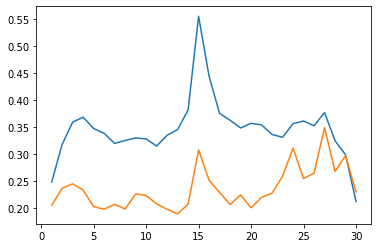

Under Progress csi_walk_b1_1.csv


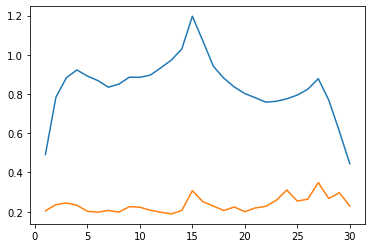

Under Progress csi_walk_b2_1.csv


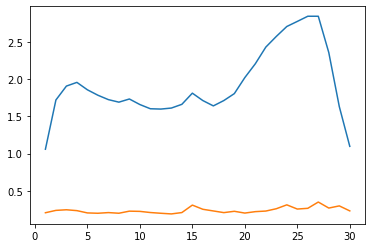

Under Progress csi_walk_e2_1.csv


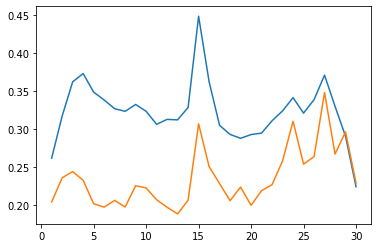

Under Progress csi_walk_a4_1.csv


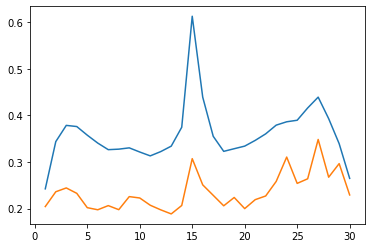

Under Progress csi_walk_e1_1.csv


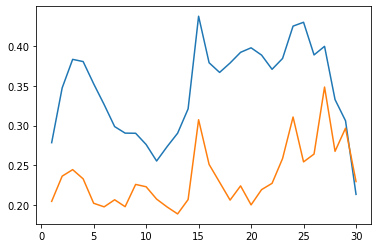

Under Progress csi_walk_a5_1.csv


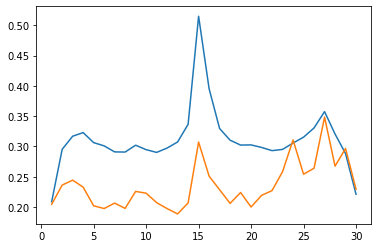

Under Progress csi_walk_b6_1.csv


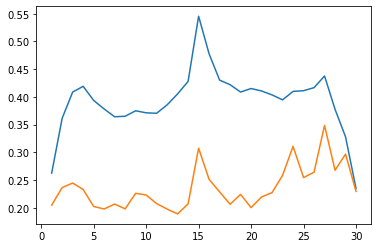

Under Progress csi_walk_a2_1.csv


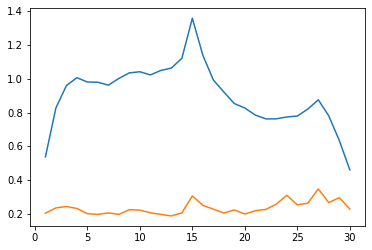

Under Progress csi_walk_d4_1.csv


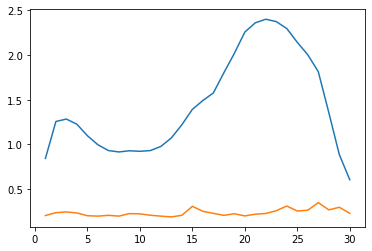

Under Progress csi_walk_c4_1.csv


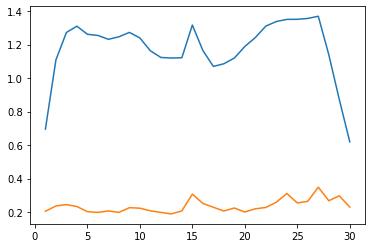

Under Progress csi_walk_d3_1.csv


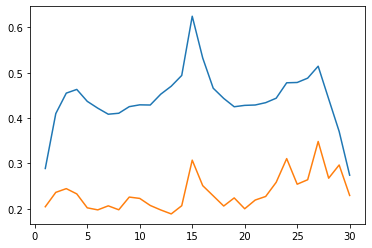

Under Progress csi_walk_c6_1.csv


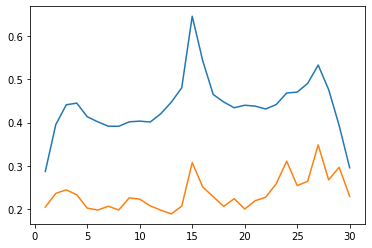

Under Progress csi_walk_a3_1.csv


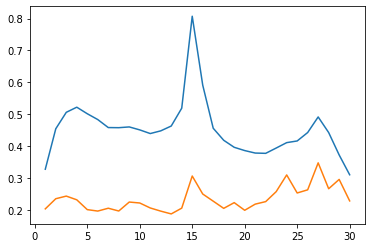

Under Progress csi_walk_d2_1.csv


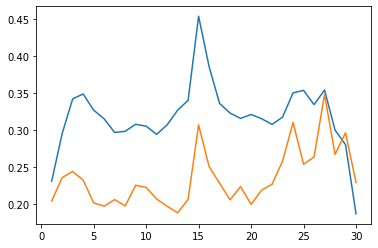

Under Progress csi_walk_e5_1.csv


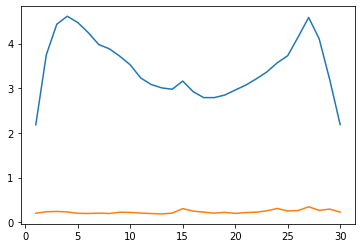

Under Progress csi_walk_c3_1.csv


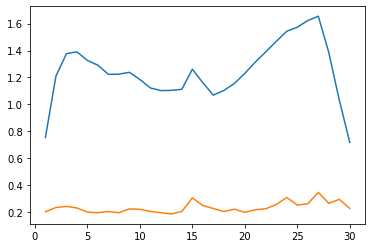

Under Progress csi_walk_e4_1.csv


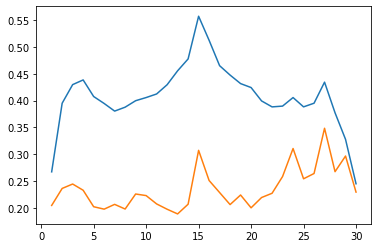

Under Progress csi_walk_c5_1.csv


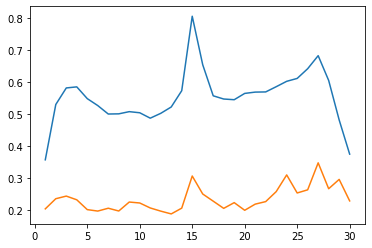

Under Progress csi_walk_e3_1.csv


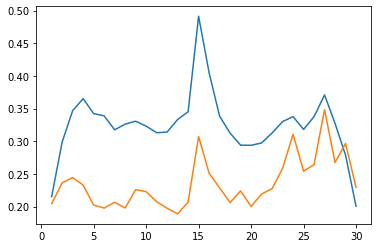

Under Progress csi_walk_b4_1.csv


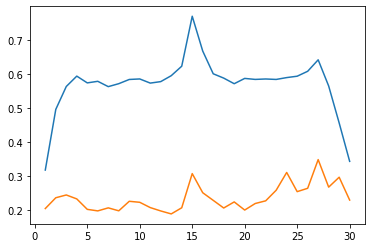

Under Progress csi_walk_b5_1.csv


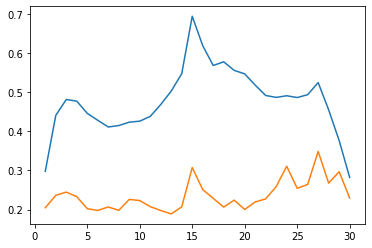

Under Progress csi_walk_b3_1.csv


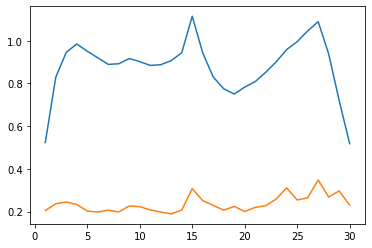

Under Progress csi_walk_a6_1.csv


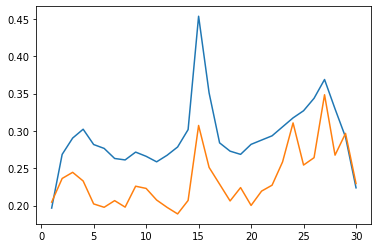

Under Progress csi_walk_d6_1.csv


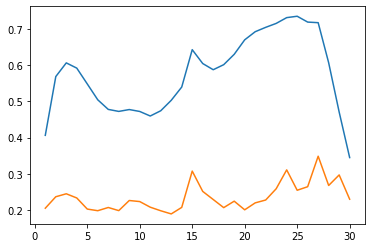

Under Progress csi_walk_c2_1.csv


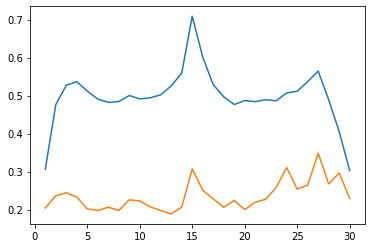

Under Progress csi_walk_d5_1.csv


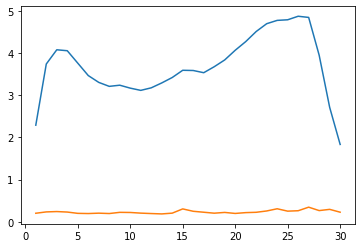

Under Progress csi_walk_d1_1.csv


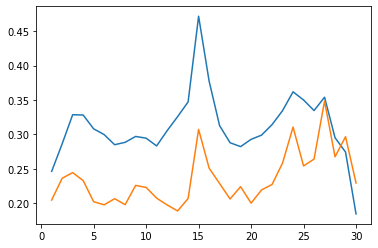

Mission Accomplished !!


In [8]:
# plotting the variances of 'b' receiver :  
import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July26_csv'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July26_csv/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        csv = a
        df = pd.read_csv(csv,usecols=range(1,91))
        df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))
        V = np.zeros((30,1))
        
        
        for i in range(1, 31):
            Z = []
            for k in ['c_']:
                Z.append(k + str(i)) 

                b= df[Z[0]].values
                #print(np.shape(b))
                m_b = np.mean(abs(b))
                V[i-1] = np.var((abs(b)-m_b)) 
            #print(V[i-1])
        
        n = np.arange(1,31)
        
        plt.plot(n,V,label = 'a_1')
        plt.plot(n,V_no,label = 'b_no_act')
        
        plt.show()
        
        
print('Mission Accomplished !!')    


Under Progress csi_walk_d6e5_2.csv


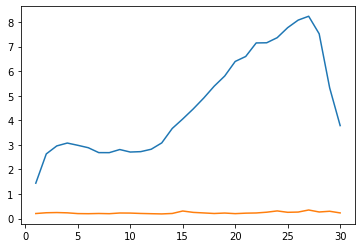

Under Progress csi_walk_a4c6_1.csv


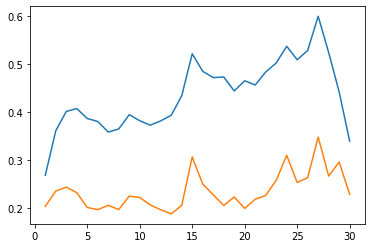

Under Progress csi_noactivity_1.csv


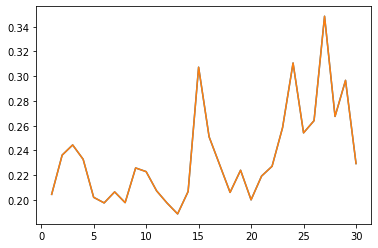

Under Progress csi_walk_a3d6_2.csv


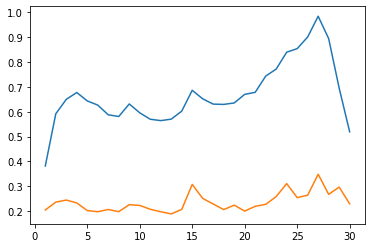

Under Progress csi_walk_b6e3_2.csv


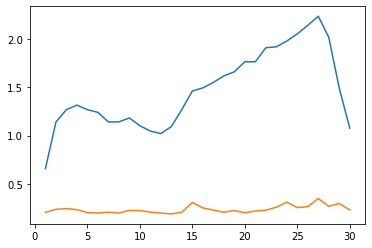

Under Progress csi_walk_a4c6_2.csv


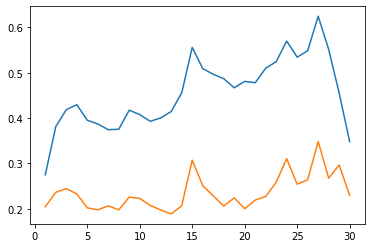

Under Progress csi_walk_b1e4_2.csv


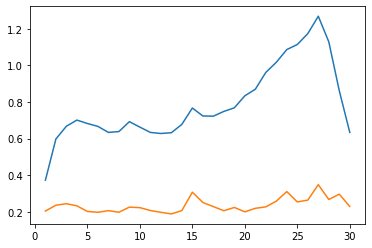

Under Progress csi_walk_a5e1_2.csv


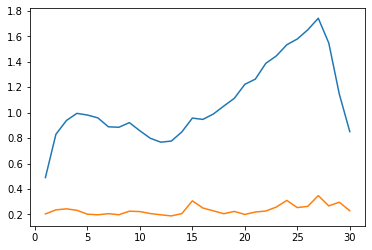

Under Progress csi_walk_a6e2_1.csv


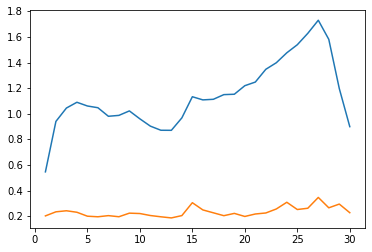

Under Progress csi_walk_a2b1_1.csv


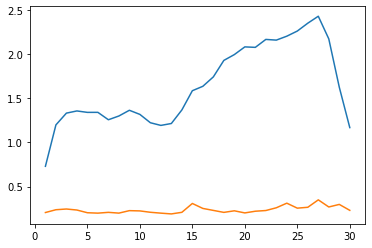

Under Progress csi_walk_d1e2_1.csv


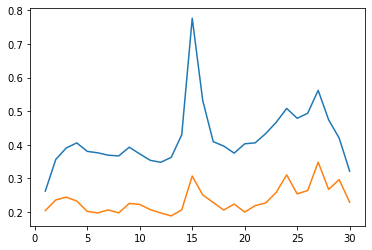

Under Progress csi_walk_a3c1_1.csv


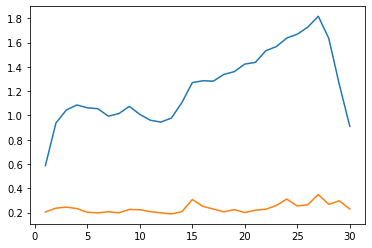

Under Progress csi_walk_a5b6_1.csv


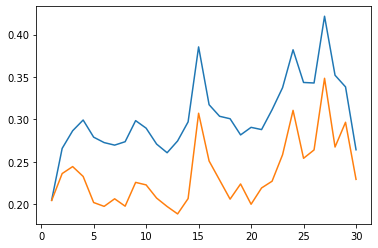

Under Progress csi_walk_a4d1_2.csv


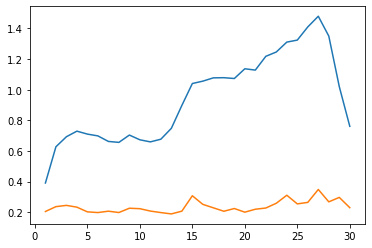

Under Progress csi_walk_a2b1_2.csv


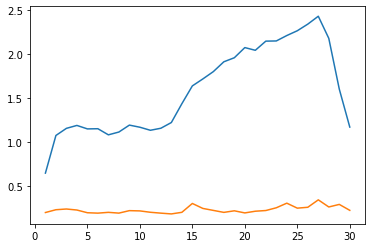

Under Progress csi_walk_a4d1_1.csv


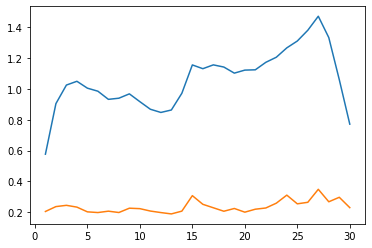

Under Progress csi_walk_a5b6_2.csv


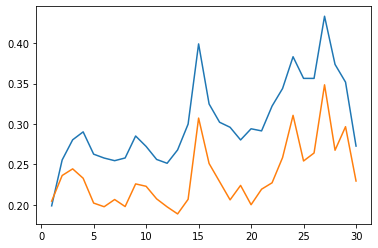

Under Progress csi_walk_a3c1_2.csv


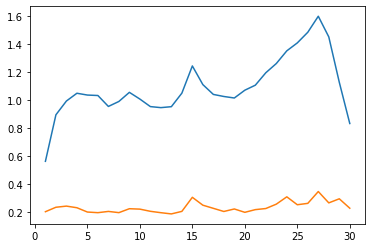

Under Progress csi_walk_c6e4_2.csv


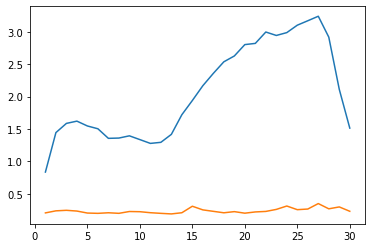

Under Progress csi_walk_d6e5_1.csv


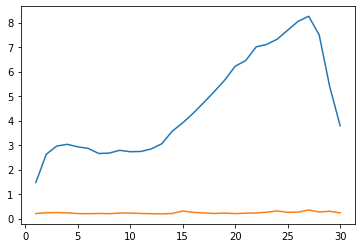

Under Progress csi_walk_a3d6_1.csv


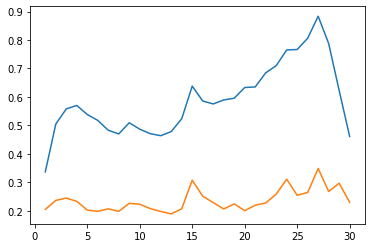

Under Progress csi_walk_c6e4_1.csv


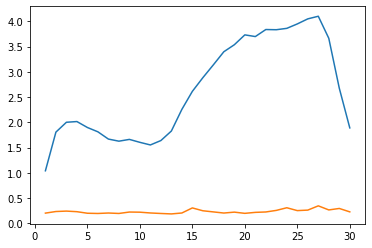

Under Progress csi_walk_c1e3_1.csv


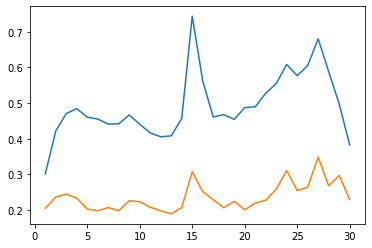

Under Progress csi_walk_a2e6_2.csv


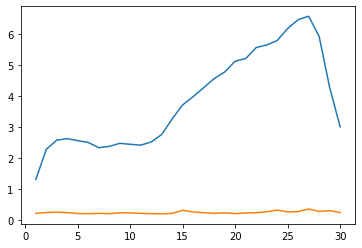

Under Progress csi_walk_b1e4_1.csv


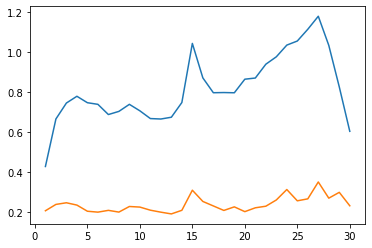

Under Progress csi_walk_c1e3_2.csv


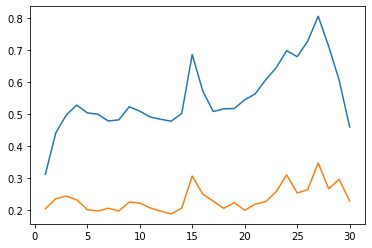

Under Progress csi_noactivity_2.csv


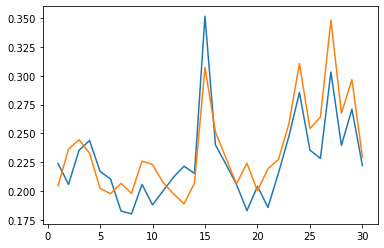

Under Progress csi_walk_b6e3_1.csv


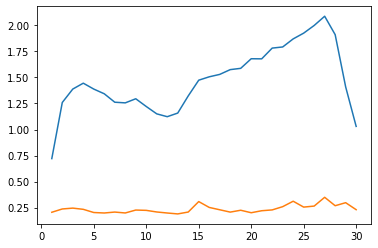

Under Progress csi_walk_a6e2_2.csv


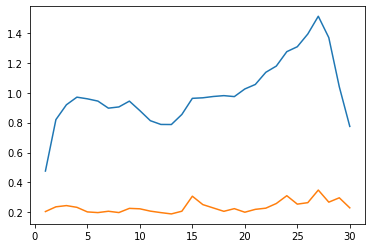

Under Progress csi_walk_a1e5_2.csv


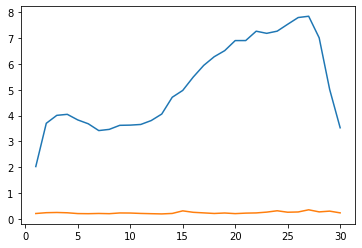

Under Progress csi_walk_a2e6_1.csv


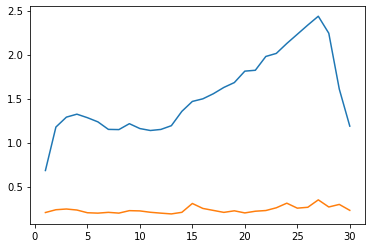

Under Progress csi_walk_a1e5_1.csv


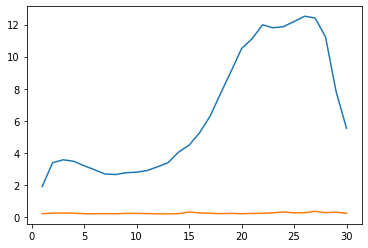

Under Progress csi_walk_a5e1_1.csv


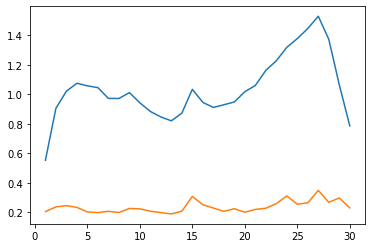

Under Progress csi_walk_b1e2_2.csv


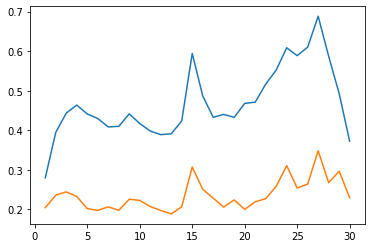

Mission Accomplished !!


In [9]:
# plotting the variances of 'b' receiver :  
import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        csv = a
        df = pd.read_csv(csv,usecols=range(1,91))
        df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))
        V = np.zeros((30,1))
        
        
        for i in range(1, 31):
            Z = []
            for k in ['c_']:
                Z.append(k + str(i)) 

                b= df[Z[0]].values
                #print(np.shape(b))
                m_b = np.mean(abs(b))
                V[i-1] = np.var((abs(b)-m_b)) 
            #print(V[i-1])
        
        n = np.arange(1,31)
        
        plt.plot(n,V,label = 'b_1')
        plt.plot(n,V_no,label = 'b_no_act')
        
        plt.show()
        
        
print('Mission Accomplished !!')    


no_act_1
['no_act_1-01', 'no_act_1-02', 'no_act_1-03', 'no_act_1-04', 'no_act_1-05', 'no_act_1-06']
(6,)


[]

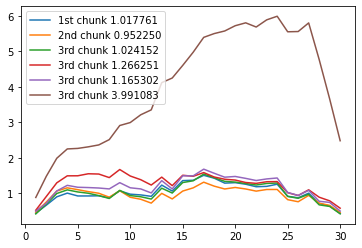

In [18]:
csv = 'July26_csv/csi_walk_d1_1.csv'

name = 'csi_walk_no_act_1.csv'
sstring1 = 'csi_walk_'
sstring2 = '.csv'
res = name.replace(sstring1, '') 
res = res.replace(sstring2, '') 

print(res)

labels = [res + '-01',res + '-02',res + '-03',res + '-04',res + '-05',res + '-06']
print(labels)

y = [0,0,0,0,0,0]

df = pd.read_csv(csv,usecols=range(1,91))
df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))

V2 = np.zeros((30,6))
V_no = np.zeros(30)

Var_mean = np.zeros((6,1))

for i in range(1, 31):
    Z = []
    k = 'a_'
    Z.append(k + str(i)) 
    #print(Z)
    
    b= df[Z[0]].values
    
    b_1 = b[0:5000]
    m_b1 = np.mean(abs(b_1))

    b_2 = b[5000:10000]
    m_b2 = np.mean(abs(b_2))
    
    b_3 = b[10000:15000]
    m_b3 = np.mean(abs(b_3))
    
    b_4 = b[15000:20000]
    m_b4 = np.mean(abs(b_4))
    
    b_5 = b[20000:25000]
    m_b5 = np.mean(abs(b_5))
    
    b_6 = b[25000:30000]
    m_b6 = np.mean(abs(b_6))

    

    
    #var = [np.var((abs(a2)-m_a2)/m_a2),np.var((abs(b2)-m_b2)/m_b2),np.var((abs(c2)-m_c2)/m_c2)]
    var = [np.var((abs(b_1)-m_b1)),np.var((abs(b_2)-m_b2)),np.var((abs(b_3)-m_b3)),np.var((abs(b_4)-m_b4)),np.var((abs(b_5)-m_b5)),np.var((abs(b_6)-m_b6))]
    V2[i-1][:] = var
    

#print(V_no)
#print('done')
#print(np.shape(V_no))

n = np.arange(1,31)
m1 = np.mean(V2[:,0])
m2 = np.mean(V2[:,1])
m3 = np.mean(V2[:,2])
m4 = np.mean(V2[:,3])
m5 = np.mean(V2[:,4])
m6 = np.mean(V2[:,5])

Var_mean = [m1,m2,m3,m4,m5,m6]
Var_mean = (np.round(Var_mean,decimals = 2))


print(np.shape(Var_mean))

data = [labels,Var_mean,y]


plt.plot(n,V2[:,0],label = '1st chunk %f'% m1)
plt.plot(n,V2[:,1],label = '2nd chunk %f'%m2)
plt.plot(n,V2[:,2],label = '3rd chunk %f'%m3)
plt.plot(n,V2[:,3],label = '3rd chunk %f'%m4)
plt.plot(n,V2[:,4],label = '3rd chunk %f'%m5)
plt.plot(n,V2[:,5],label = '3rd chunk %f'%m6)


plt.legend()
plt.plot()

no_act_2
['no_act_2-01', 'no_act_2-02', 'no_act_2-03', 'no_act_2-04', 'no_act_2-05', 'no_act_2-06']
(6,)


[]

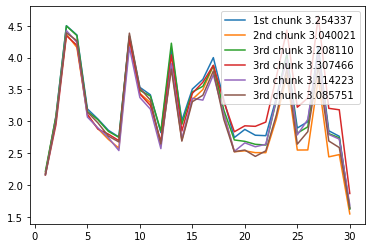

In [27]:
csv = 'July26_csv/csi_walk_a2_1.csv'

name = 'csi_walk_no_act_2.csv'
sstring1 = 'csi_walk_'
sstring2 = '.csv'
res = name.replace(sstring1, '') 
res = res.replace(sstring2, '') 

print(res)

labels = [res + '-01',res + '-02',res + '-03',res + '-04',res + '-05',res + '-06']
print(labels)

y = [0,0,0,0,0,0]

df = pd.read_csv(csv,usecols=range(1,91))
df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))

V2 = np.zeros((30,6))
V_no = np.zeros(30)

Var_mean = np.zeros((6,1))

for i in range(1, 31):
    Z = []
    k = 'b_'
    Z.append(k + str(i)) 
    #print(Z)
    
    b= df[Z[0]].values
    
    b_1 = b[0:5000]
    m_b1 = np.mean(abs(b_1))

    b_2 = b[5000:10000]
    m_b2 = np.mean(abs(b_2))
    
    b_3 = b[10000:15000]
    m_b3 = np.mean(abs(b_3))
    
    b_4 = b[15000:20000]
    m_b4 = np.mean(abs(b_4))
    
    b_5 = b[20000:25000]
    m_b5 = np.mean(abs(b_5))
    
    b_6 = b[25000:30000]
    m_b6 = np.mean(abs(b_6))

    

    
    #var = [np.var((abs(a2)-m_a2)/m_a2),np.var((abs(b2)-m_b2)/m_b2),np.var((abs(c2)-m_c2)/m_c2)]
    var = [np.var((abs(b_1)-m_b1)),np.var((abs(b_2)-m_b2)),np.var((abs(b_3)-m_b3)),np.var((abs(b_4)-m_b4)),np.var((abs(b_5)-m_b5)),np.var((abs(b_6)-m_b6))]
    V2[i-1][:] = var
    

#print(V_no)
#print('done')
#print(np.shape(V_no))

n = np.arange(1,31)
m1 = np.mean(V2[:,0])
m2 = np.mean(V2[:,1])
m3 = np.mean(V2[:,2])
m4 = np.mean(V2[:,3])
m5 = np.mean(V2[:,4])
m6 = np.mean(V2[:,5])

Var_mean = [m1,m2,m3,m4,m5,m6]
Var_mean = (np.round(Var_mean,decimals = 2))


print(np.shape(Var_mean))

data2 = [labels,Var_mean,y]


plt.plot(n,V2[:,0],label = '1st chunk %f'% m1)
plt.plot(n,V2[:,1],label = '2nd chunk %f'%m2)
plt.plot(n,V2[:,2],label = '3rd chunk %f'%m3)
plt.plot(n,V2[:,3],label = '3rd chunk %f'%m4)
plt.plot(n,V2[:,4],label = '3rd chunk %f'%m5)
plt.plot(n,V2[:,5],label = '3rd chunk %f'%m6)


plt.legend()
plt.plot()

In [25]:
my_df = pd.DataFrame()
df_temp = pd.DataFrame(np.transpose(data2))
my_df = my_df.append(df_temp)
print(my_df)
my_df.to_csv('data_set.csv', index=False) 
print('done')

             0      1  2
0  no_act_2-01  29.68  0
1  no_act_2-02  17.95  0
2  no_act_2-03  29.77  0
3  no_act_2-04  22.18  0
4  no_act_2-05  30.42  0
5  no_act_2-06  22.11  0
done


In [7]:
name = 'csi_walk_d6e5_1.csv'
sstring1 = 'csi_walk_'
sstring2 = '.csv'
res = name.replace(sstring1, '') 
res = res.replace(sstring2, '') 
res = res + '-01'
print(res)

d6e5_1-01


In [33]:
## phase difference analysis



import os
directory = '/home/surya/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv'
z = '~/Desktop/wifi_sensing/intel_dataset/intel_captures_for_25x30Room/July19_csv/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        a = z + filename
        print('Under Progress',filename)
        csv = a



        df = pd.read_csv(csv,usecols=range(1,91))

        df =df.applymap(lambda s: np.complex(s.replace('i', 'j')))


        A0_1= df["a_1"].values
        A1_1= df["b_1"].values
        A2_1= df["c_1"].values


        len = np.size(A0_1)
        print(len)
        Fs = 1e4
        Ts = 1/Fs
        t = np.arange(0,len)/Fs

        m0_1 = np.mean((phase(A0_1)-phase(A1_1)))
        m1_1 = np.mean((phase(A1_1)-phase(A2_1)))
        m2_1 = np.mean((phase(A2_1)-phase(A0_1)))
        
        mean = [m0_1,m1_1,m2_1]
        var = [np.var(((phase(A0_1)-phase(A1_1)))),np.var(((phase(A1_1)-phase(A2_1)))),np.var(((phase(A2_1)-phase(A0_1))))]
        print('VARIANCE',var)
        print('MEAN',mean)

'''
plt.plot(t,(((phase(A0_1)-phase(A1_1))-m0_1)/m0_1))
plt.show()
plt.plot(t,(((phase(A1_1)-phase(A2_1))-m1_1)/m1_1))
plt.show()
plt.plot(t,(((phase(A2_1)-phase(A0_1))-m2_1)/m2_1))
plt.show()
'''



Under Progress csi_walk_d6e5_2.csv
30085
VARIANCE [23980.39381972478, 30020.396538299694, 27057.07319956464]
MEAN [0.04749069956415858, -5.802597947967111, 5.755107248402952]
Under Progress csi_walk_a4c6_1.csv
30041
VARIANCE [24226.881816201214, 31561.815110834876, 28140.338252380403]
MEAN [0.20752049514991705, -5.959446217977978, 5.751925722828062]
Under Progress csi_noactivity_1.csv
30007
VARIANCE [23331.126765820074, 32065.134177263517, 27153.69852738388]
MEAN [0.6186480234266043, -6.6337289929519505, 6.0150809695253455]
Under Progress csi_walk_a3d6_2.csv
30041
VARIANCE [22667.555788333542, 31982.910092287933, 27829.751962799124]
MEAN [-1.7931284176513662, -6.235602691744866, 8.028731109396231]
Under Progress csi_walk_b6e3_2.csv
30085
VARIANCE [24678.922791238772, 30620.41839108827, 27550.456087909555]
MEAN [-2.0473086087075574, -5.659986231341151, 7.707294840048709]
Under Progress csi_walk_a4c6_2.csv
30041
VARIANCE [24304.809242810687, 31518.20933693247, 28282.985233650605]
MEAN [-

'\nplt.plot(t,(((phase(A0_1)-phase(A1_1))-m0_1)/m0_1))\nplt.show()\nplt.plot(t,(((phase(A1_1)-phase(A2_1))-m1_1)/m1_1))\nplt.show()\nplt.plot(t,(((phase(A2_1)-phase(A0_1))-m2_1)/m2_1))\nplt.show()\n'